## Week 1: Using CNN's with the Cats vs Dogs Dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import shutil
import random
import os

from tensorflow.keras import layers
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
dataset_url = "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip"
zip_path = tf.keras.utils.get_file(origin=dataset_url, extract=False)

In [3]:
data_path = os.path.dirname(zip_path)
source_path = os.path.join(data_path, 'PetImages')
source_path_cats = os.path.join(source_path, 'Cat')
source_path_dogs = os.path.join(source_path, 'Dog')

#### Data cleaning

In [4]:
file1_path = os.path.join(source_path_cats, 'Thumbs.db')
file2_path = os.path.join(source_path_dogs, 'Thumbs.db')

if os.path.exists(file1_path):
    os.remove(file1_path)

if os.path.exists(file2_path):
    os.remove(file2_path)

In [5]:
print(f'There are {len(os.listdir(source_path_dogs))} images of dogs')
print(f'There are {len(os.listdir(source_path_cats))} images of cats')

There are 12500 images of dogs
There are 12500 images of cats


In [6]:
root_dir = os.path.join(data_path, 'cats-v-dogs')

training_dir = os.path.join(root_dir, 'training')
validation_dir = os.path.join(root_dir, 'validation')

training_cats_dir = os.path.join(training_dir, 'cats')
training_dogs_dir = os.path.join(training_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
    os.makedirs(training_cats_dir)
    os.makedirs(training_dogs_dir)
    os.makedirs(validation_cats_dir)
    os.makedirs(validation_dogs_dir)

create_train_val_dirs(root_dir)

In [7]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

C:\Users\Eduardo\.keras\datasets\cats-v-dogs\training
C:\Users\Eduardo\.keras\datasets\cats-v-dogs\validation
C:\Users\Eduardo\.keras\datasets\cats-v-dogs\training\cats
C:\Users\Eduardo\.keras\datasets\cats-v-dogs\training\dogs
C:\Users\Eduardo\.keras\datasets\cats-v-dogs\validation\cats
C:\Users\Eduardo\.keras\datasets\cats-v-dogs\validation\dogs


In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

    source_files = []

    for image_name in os.listdir(SOURCE_DIR):
        image_path = os.path.join(SOURCE_DIR, image_name)
        try:
            img_bytes = tf.io.read_file(image_path)
            decoded_img = tf.io.decode_image(img_bytes)
        except tf.errors.InvalidArgumentError as e:
            print(f'Found bad path {image_path}')
            continue

        source_files.append(image_name)

    num_images = len(source_files)
    num_training = int(num_images * SPLIT_SIZE)
    list_files = random.sample(source_files, num_images)
    training_images = list_files[:num_training]
    validation_images = list_files[num_training:]

    for training_image in training_images:
        shutil.copyfile(os.path.join(SOURCE_DIR, training_image), os.path.join(TRAINING_DIR, training_image))

    for validation_image in validation_images:
        shutil.copyfile(os.path.join(SOURCE_DIR, validation_image), os.path.join(VALIDATION_DIR, validation_image))

In [ ]:
# Empty directories in case you run this cell multiple times
if len(os.listdir(training_cats_dir)) > 0:
    for file in os.scandir(training_cats_dir):
        os.remove(file.path)
if len(os.listdir(training_dogs_dir)) > 0:
    for file in os.scandir(training_dogs_dir):
        os.remove(file.path)
if len(os.listdir(validation_cats_dir)) > 0:
    for file in os.scandir(validation_cats_dir):
        os.remove(file.path)
if len(os.listdir(validation_dogs_dir)) > 0:
    for file in os.scandir(validation_dogs_dir):
        os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# NOTE: Messages about zero length images should be printed out
split_data(source_path_cats, training_cats_dir, validation_cats_dir, split_size)
split_data(source_path_dogs, training_dogs_dir, validation_dogs_dir, split_size)

In [8]:
# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal cat's directory has {len(os.listdir(source_path_cats))} images")
print(f"Original dog's directory has {len(os.listdir(source_path_dogs))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(training_cats_dir))} images of cats for training")
print(f"There are {len(os.listdir(training_dogs_dir))} images of dogs for training")
print(f"There are {len(os.listdir(validation_cats_dir))} images of cats for validation")
print(f"There are {len(os.listdir(validation_dogs_dir))} images of dogs for validation")



Original cat's directory has 12500 images
Original dog's directory has 12500 images

There are 11247 images of cats for training
There are 11244 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


In [ ]:
# def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

#     train_datagen = ImageDataGenerator(rescale=1/255.0)

#     train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
#                                                         batch_size=128,
#                                                         class_mode='binary',
#                                                         target_size=(150, 150))

#     validation_datagen = ImageDataGenerator(rescale=1/255.0)

#     validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
#                                                                     batch_size=128,
#                                                                     class_mode='binary',
#                                                                     target_size=(150, 150))

#     return train_generator, validation_generator

# train_generator, validation_generator = train_val_generators(training_dir, validation_dir)

In [9]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    training_dir,
    batch_size=128,
    image_size=(150, 150)
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    batch_size=32,
    image_size=(150, 150)
)

Found 22491 files belonging to 2 classes.
Found 2500 files belonging to 2 classes.


#### Configure the dataset for performance

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['accuracy'] > 0.95 and logs['val_accuracy'] > 0.8:
            print('\nReached 95% accuracy and 80% validation accuracy so cancelling training')
            self.model.stop_training = True

In [12]:
def create_model():

    model = tf.keras.Sequential([ 
        layers.Rescaling(1./255, input_shape=(150, 150, 3)),
        layers.Conv2D(16, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')])

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy']) 

    return model

In [13]:
model = create_model()

callbacks = myCallback()

history = model.fit(train_dataset,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_dataset,
                    callbacks=[callbacks])

Epoch 1/15
176/176 [==============================] - 21s 98ms/step - loss: 0.7363 - accuracy: 0.6202 - val_loss: 0.5831 - val_accuracy: 0.6792
Epoch 2/15
176/176 [==============================] - 18s 99ms/step - loss: 0.5524 - accuracy: 0.7200 - val_loss: 0.5151 - val_accuracy: 0.7440
Epoch 3/15
176/176 [==============================] - 19s 104ms/step - loss: 0.4761 - accuracy: 0.7716 - val_loss: 0.5767 - val_accuracy: 0.7280
Epoch 4/15
176/176 [==============================] - 19s 106ms/step - loss: 0.4199 - accuracy: 0.8080 - val_loss: 0.4195 - val_accuracy: 0.8112
Epoch 5/15
176/176 [==============================] - 19s 102ms/step - loss: 0.3689 - accuracy: 0.8372 - val_loss: 0.4351 - val_accuracy: 0.8052
Epoch 6/15
176/176 [==============================] - 18s 101ms/step - loss: 0.3135 - accuracy: 0.8626 - val_loss: 0.4024 - val_accuracy: 0.8260
Epoch 7/15
176/176 [==============================] - 18s 101ms/step - loss: 0.2579 - accuracy: 0.8929 - val_loss: 0.5698 - val_accu

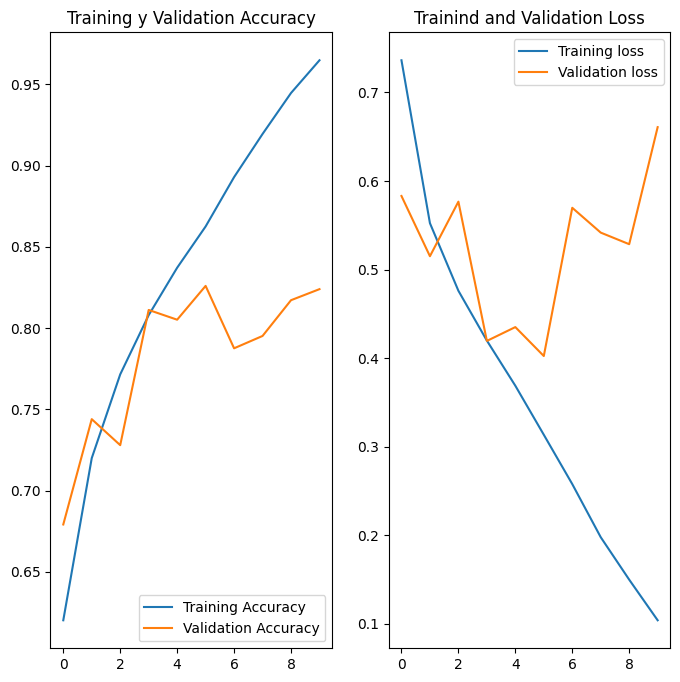

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training y Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Trainind and Validation Loss')
plt.show()